# How to make an animation of an object from its stamps

```Author: Ignacio Reyes, Last updated: 20251010```

*It is highly recommended that you try this notebook in Google Colab using the following [link](https://colab.research.google.com/github/alercebroker/usecases/blob/master/notebooks/ALeRCE_ZTF_Stamp_animation.ipynb).*
This will avoid you from having to sort out library installation problems and focus on the contents of the tutorial. You can try installing the dependencies later in your own system.

In [1]:
#!pip install alerce
#!pip install pygifsicle
#!sudo apt-get install gifsicle # Works in Ubuntu (including Colab)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alerce.core import Alerce
import imageio as iio
from pygifsicle import optimize
import os

In [3]:
alerce_client = Alerce()

### Input the object id

In [4]:
oid = 'ZTF21abcouxj'

### Download the light curve

In [5]:
curve = alerce_client.query_detections(oid, format='pandas')
curve

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,rbversion,drb,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,step_id_corr,phase
0,ztf,59362.201724,1608201720515015022,1,1608201720515,20.472510,1,1608,4.640870,19.142166,...,t17_f5_c3,1.000000,19.1578,0.1536,717120105,True,False,False,correction_0.0.1,0.0
1,ztf,59362.245347,1608245340515015006,2,1608245340515,20.222622,1,1608,4.799460,19.229542,...,t17_f5_c3,0.999999,19.4883,0.2865,717120205,True,False,False,correction_0.0.1,0.0
2,ztf,59364.324664,1610324660515015009,2,1610324660515,20.309284,1,1610,4.825271,18.793653,...,t17_f5_c3,0.999994,19.0385,0.1743,717120205,True,False,False,correction_0.0.1,0.0
3,ztf,59366.215046,1612215040515015014,2,1612215040515,20.717949,1,1612,4.897573,18.454298,...,t17_f5_c3,0.999999,18.4401,0.0737,717120205,True,False,False,correction_0.0.1,0.0
4,ztf,59366.260949,1612260940515015009,1,1612260940515,20.751670,1,1612,4.667271,18.252869,...,t17_f5_c3,1.000000,18.2742,0.0562,717120105,True,False,False,correction_0.0.1,0.0
5,ztf,59368.197130,1614197120515015011,1,1614197120515,20.858180,1,1614,4.650076,18.080196,...,t17_f5_c3,0.999961,18.1005,0.0448,717120105,True,False,False,correction_0.0.1,0.0
6,ztf,59368.223843,1614223840515015008,2,1614223840515,20.724453,1,1614,4.893858,18.281120,...,t17_f5_c3,1.000000,18.2795,0.0638,717120205,True,False,False,correction_0.0.1,0.0
7,ztf,59370.226192,1616226190515015007,1,1616226190515,20.788668,1,1616,4.684872,17.963675,...,t17_f5_c3,1.000000,17.9399,0.0402,717120105,True,False,False,correction_0.0.1,0.0
8,ztf,59370.261308,1616261300515015016,2,1616261300515,20.665789,1,1616,4.928461,18.130676,...,t17_f5_c3,0.999997,18.0270,0.0524,717120205,True,False,False,correction_0.0.1,0.0
9,ztf,59372.197963,1618197960515015013,1,1618197960515,20.464853,1,1618,4.690574,17.893255,...,t17_f5_c3,1.000000,17.8570,0.0481,717120105,True,False,False,correction_0.0.1,0.0


### Let's use the g band only

In [6]:
g_band = curve[curve.fid == 1].copy()

### Download the image stamps

In [7]:
stamps = []
candid_g = g_band.candid.values
for i, candid in enumerate(candid_g):
    stamp = alerce_client.get_stamps(oid, candid=candid)
    stamps.append(stamp)
g_band['stamps'] = stamps
g_band

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,drb,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,step_id_corr,phase,stamps
0,ztf,59362.201724,1608201720515015022,1,1608201720515,20.472510,1,1608,4.640870,19.142166,...,1.000000,19.1578,0.1536,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
4,ztf,59366.260949,1612260940515015009,1,1612260940515,20.751670,1,1612,4.667271,18.252869,...,1.000000,18.2742,0.0562,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
5,ztf,59368.197130,1614197120515015011,1,1614197120515,20.858180,1,1614,4.650076,18.080196,...,0.999961,18.1005,0.0448,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
7,ztf,59370.226192,1616226190515015007,1,1616226190515,20.788668,1,1616,4.684872,17.963675,...,1.000000,17.9399,0.0402,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
9,ztf,59372.197963,1618197960515015013,1,1618197960515,20.464853,1,1618,4.690574,17.893255,...,1.000000,17.8570,0.0481,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
11,ztf,59375.279271,1621279270515015004,1,1621279270515,20.353855,1,1621,4.722840,17.893421,...,0.999998,17.8918,0.0461,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
13,ztf,59377.301076,1623301070515015004,1,1623301070515,20.548473,1,1623,4.663636,17.973140,...,1.000000,18.0184,0.0516,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
14,ztf,59379.201482,1625201480515015013,1,1625201480515,20.766462,1,1625,4.659056,18.041113,...,1.000000,18.0626,0.0468,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
16,ztf,59381.301898,1627301890515015009,1,1627301890515,19.420963,1,1627,4.718821,18.210794,...,1.000000,18.4161,0.2059,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...
18,ztf,59383.262917,1629262910515015003,1,1629262910515,19.592540,1,1629,4.657873,18.293175,...,0.999999,18.4505,0.1803,717120105,True,False,False,correction_0.0.1,0.0,[<astropy.io.fits.hdu.image.PrimaryHDU object ...


In [8]:
g_band.dropna(subset=['stamps'], inplace=True)
g_band['science_stamp'] = [stamp[0].data for stamp in g_band['stamps']]

### We will map the values measured in the camera to the 0 - 1 range
Taking all stamps into account, we will compute the percentile 1 and percentile 99.5 of the values of the pixels, ignoring the center of the stamp. Those values will be used to scale the brightness of each stamp.
An arcsinh operation is also performed.

In [9]:
science_ndarray = np.stack(g_band['science_stamp'].values, axis=-1)

In [10]:
center_mask = np.zeros((63, 63)).astype(bool)
center_pix = 63 / 2
radius_sq = 4
for i in range(63):
    for j in range(63):
        dist = (i - center_pix) ** 2 + (j - center_pix) ** 2
        if dist >= radius_sq:
            continue
        center_mask[i, j] = True

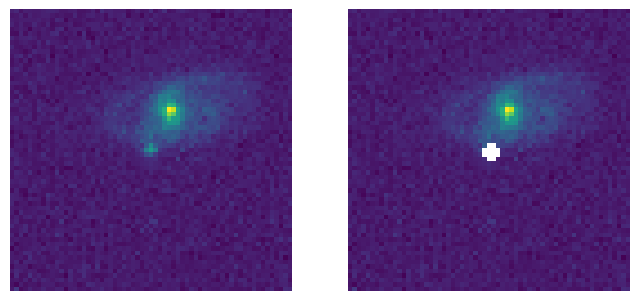

In [11]:
im = g_band['science_stamp'].iloc[0].copy()
plt.figure(figsize=(8, 5), facecolor='white')
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.gca().axis('off')

plt.subplot(1, 2, 2)
im[center_mask] = np.nan
plt.imshow(im)
plt.gca().axis('off');

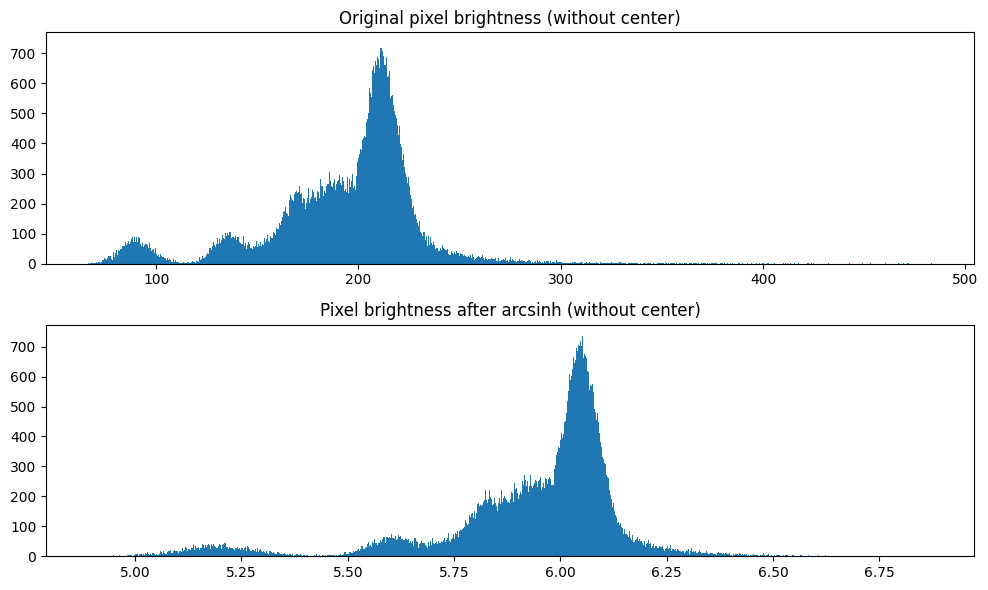

In [12]:
non_center_values = science_ndarray[~center_mask, :].flatten()

p1 = np.nanpercentile(non_center_values, 1)
p995 = np.nanpercentile(non_center_values, 99.5)

plt.figure(figsize=(10, 6), facecolor='white')
plt.subplot(2, 1, 1)
plt.hist(non_center_values, bins=1000)
plt.title('Original pixel brightness (without center)')
plt.subplot(2, 1, 2)
plt.hist(np.arcsinh(non_center_values), bins=1000)
plt.title('Pixel brightness after arcsinh (without center)')
plt.tight_layout();

In [13]:
def preprocess(im, low, high):
    asinh = np.arcsinh(im)
    low = np.arcsinh(low)
    high = np.arcsinh(high)
    asinh = (asinh - low) / (high - low) * 0.9
    final_imgs = np.clip(asinh, 0, 1)
    return final_imgs

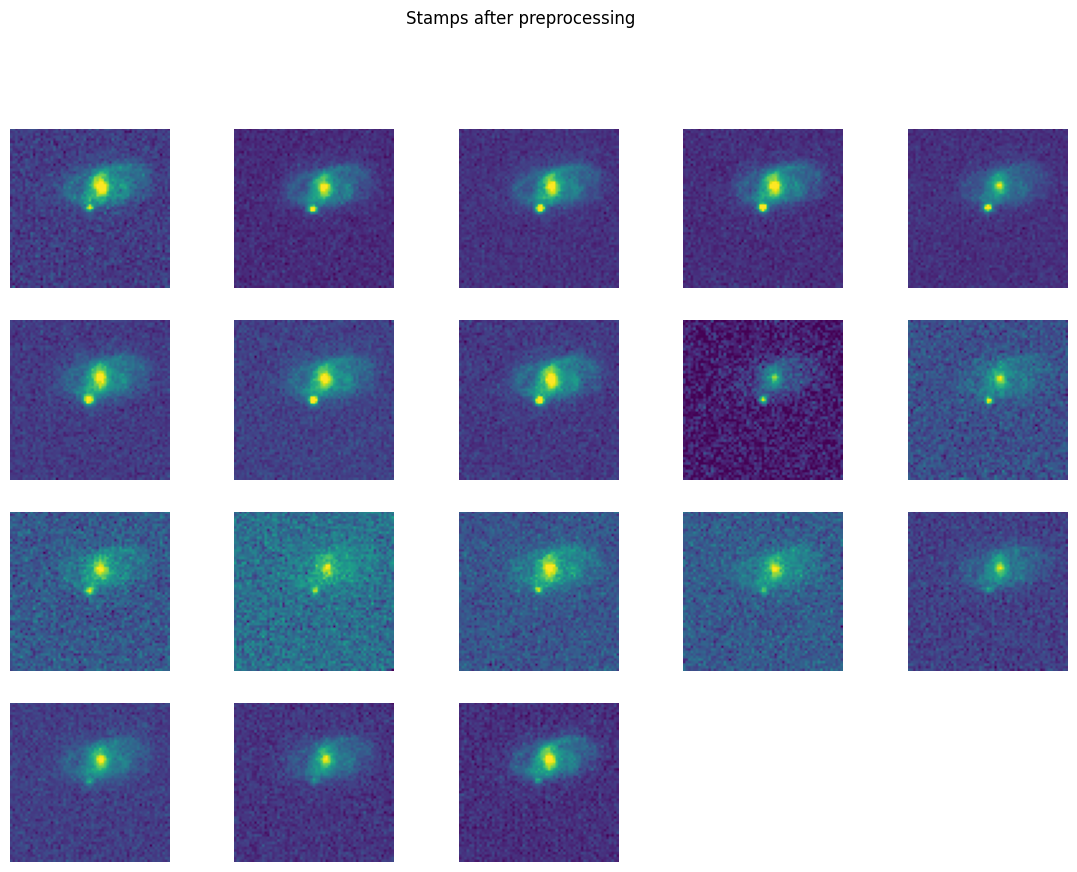

In [14]:
n_stamps = len(g_band)
plt.figure(figsize=(14, 12), facecolor='white')
plt.suptitle('Stamps after preprocessing')
for index in range(n_stamps):
    im = preprocess(g_band['science_stamp'].iloc[index], p1, p995)
    plt.subplot(int(np.ceil(np.sqrt(n_stamps))), int(np.ceil(np.sqrt(n_stamps))), index+1)
    plt.imshow(im)
    plt.gca().axis('off')

## Save stamps and create GIF

In [15]:
if not os.path.exists(oid):
    os.mkdir(oid)
    
gif_path = os.path.join(oid, "test.gif")
frames_path = os.path.join(oid, "{i}.jpg")

for i in range(n_stamps):
    plt.figure(figsize=(6, 6))
    det = g_band.iloc[i]
    im = preprocess(det['science_stamp'], p1, p995)
    plt.imshow(im)
    plt.gca().axis('off')
    plt.title(oid, fontsize=18)
    plt.tight_layout()
    plt.savefig(frames_path.format(i=i))
    plt.close()

with iio.get_writer(gif_path, mode='I', fps=5) as writer:
    for i in range(n_stamps):
        writer.append_data(iio.imread(frames_path.format(i=i)))
        
optimize(gif_path)

/tmp/ipykernel_764927/164886474.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(iio.imread(frames_path.format(i=i)))


### Make MP4 video from GIF

In [16]:
!ffmpeg -i ZTF21abcouxj/test.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ZTF21abcouxj/test.mp4

ffmpeg version 6.1.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redhat-package-notes ' -